# Begin

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pandas.plotting import scatter_matrix

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
data  = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/wine-reviews/winemag-data-130k-v2.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
del data['Unnamed: 0']

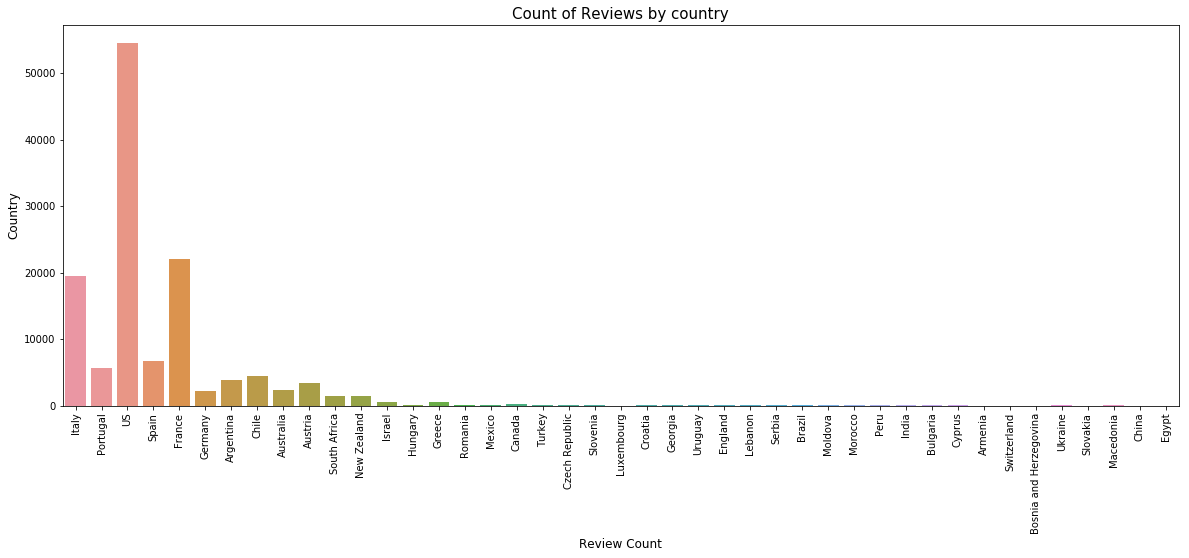

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

plt.figure(figsize=(20,7))
sns.countplot(x="country", data=data)
plt.ylabel("Country",fontsize = 12)
plt.xlabel("Review Count", fontsize=12)
plt.xticks(rotation=90)
plt.title("Count of Reviews by country", fontsize=15)
plt.show()

# Готовим данные

In [0]:
data

In [0]:
country_list = ['US','Italy','France','Spain','Chile','Argentina','Portugal','Australia','New Zealand','Germany','South Africa']
sub_data = data[data['country'].isin(country_list)]

In [7]:
categorical_columns = [c for c in sub_data.columns if sub_data[c].dtype.name == 'object']
numerical_columns   = [c for c in sub_data.columns if sub_data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['country', 'description', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']
['points', 'price']


# Обрабатываем пропущенные значения

In [8]:
sub_data.median(axis = 0)

points    88.0
price     25.0
dtype: float64

In [0]:
sub_data = sub_data.fillna(sub_data.median(axis = 0), axis = 0)

In [10]:
sub_data[numerical_columns].count(axis = 0)

points    124059
price     124059
dtype: int64

In [11]:
sub_data[categorical_columns].count(axis = 0)

country                  124059
description              124059
designation               87685
province                 124059
region_1                 108467
region_2                  50511
taster_name               97835
taster_twitter_handle     93087
title                    124059
variety                  124058
winery                   124059
dtype: int64

In [12]:
sub_data['country'].describe()

count     124059
unique        11
top           US
freq       54504
Name: country, dtype: object

In [13]:
sub_data['country'].describe().top

'US'

In [0]:
sub_data['country'] = sub_data['country'].fillna('US')

In [15]:
sub_data.describe(include = [object])

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,124059,124059,87685,124059,108467,50511,97835,93087,124059,124058,124059
unique,11,114587,35871,221,1218,17,17,14,113487,598,16044
top,US,"Seductively tart in lemon pith, cranberry and ...",Reserve,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,1873,36247,4480,11065,24381,24381,11,13081,222


In [0]:
data_describe = sub_data.describe(include = [object])
for c in categorical_columns:
    sub_data[c] = sub_data[c].fillna(data_describe[c]['top'])

In [17]:
sub_data.describe(include = [object])

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,124059,124059,124059,124059,124059,124059,124059,124059,124059,124059,124059
unique,11,114587,35871,221,1218,17,17,14,113487,598,16044
top,US,"Seductively tart in lemon pith, cranberry and ...",Reserve,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,38247,36247,20072,84613,50605,55353,11,13082,222


# Векторизация

In [18]:
data_describe = sub_data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2 ]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['country', 'description', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']


In [0]:
# data = data.dropna()

del sub_data['taster_name']
del sub_data['taster_twitter_handle']

In [0]:
wine_France = sub_data[sub_data['country'] == 'France']

In [25]:
value_counts = wine_France["variety"].value_counts()
value_counts.head()

Bordeaux-style Red Blend    4725
Chardonnay                  2808
Pinot Noir                  1966
Rosé                        1923
Champagne Blend             1243
Name: variety, dtype: int64

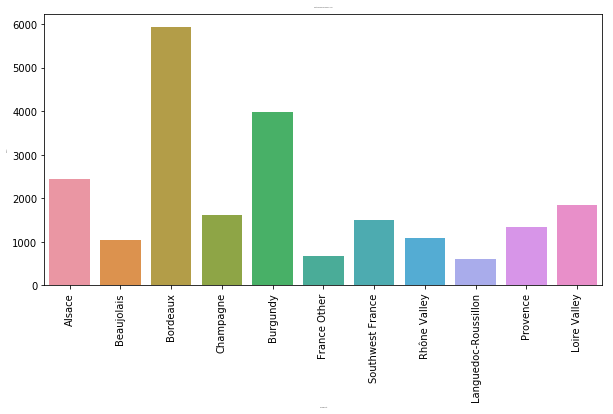

In [27]:
plt.figure(figsize=(10,5))
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
sns.countplot(x="province", data=wine_France,)
plt.ylabel("province",fontsize = .1)
plt.xlabel("Review Count", fontsize=.1)
plt.title("Count of Reviews by province in France", fontsize=.2)
plt.xticks(rotation=90)
plt.show()

In [0]:
varietylist = ['Bordeaux-style Red Blend','Chardonnay','Pinot Noir','Rosé','Champagne Blend']
subdata = wine_France[wine_France['variety'].isin(varietylist)]

In [29]:
subdata

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
63,France,"This fat, yeasty Champagne is comprised predom...",Brut Rosé,86,58.0,Champagne,Champagne,Central Coast,Roland Champion NV Brut Rosé (Champagne),Champagne Blend,Roland Champion
65,France,"From the warm 2015 vintage, this is a soft and...",Reserve,86,24.0,Burgundy,Chablis,Central Coast,Simonnet-Febvre 2015 Chablis,Chardonnay,Simonnet-Febvre
66,France,"This soft, rounded wine is ripe with generous ...",Reserve,86,15.0,Burgundy,Mâcon-Milly Lamartine,Central Coast,Vignerons des Terres Secrètes 2015 Mâcon-Mill...,Chardonnay,Vignerons des Terres Secrètes
69,France,"This cooperative, based in Aÿ, has benefited f...",Brut Rosé,86,55.0,Champagne,Champagne,Central Coast,Collet NV Brut Rosé (Champagne),Champagne Blend,Collet
136,France,This wine's black cherry and plum flavors veer...,Reserve,91,50.0,Bordeaux,Saint-Émilion,Central Coast,Lassègue 2003 Saint-Émilion,Bordeaux-style Red Blend,Lassègue
179,France,The impact of 50-year old vines is seen in the...,Les Vénérables Vieilles Vignes,88,27.0,Burgundy,Chablis,Central Coast,La Chablisienne 2006 Les Vénérables Vieilles V...,Chardonnay,La Chablisienne
193,France,"A citrus-dominated wine, lime and lemon giving...",Reserve,87,35.0,Burgundy,St.-Romain,Central Coast,Bertrand Ambroise 2006 St.-Romain,Chardonnay,Bertrand Ambroise
290,France,This is a wine that has great potential—you ca...,Reserve,92,25.0,Bordeaux,Saint-Estèphe,Central Coast,Château Lafon-Rochet 2011 Saint-Estèphe,Bordeaux-style Red Blend,Château Lafon-Rochet
307,France,"Rich and full in the mouth, packed with red fr...",Les Dames Huguettes,87,30.0,Burgundy,Côte de Nuits-Villages,Central Coast,Domaine Bertagna 2009 Les Dames Huguettes (Cô...,Pinot Noir,Domaine Bertagna
334,France,"A ripe, fruity wine that takes its raspberry f...",Mosaïque Rosé Brut,86,42.0,Champagne,Champagne,Central Coast,Jacquart NV Mosaïque Rosé Brut (Champagne),Champagne Blend,Jacquart


In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(subdata['variety'])
label_encoded_y = label_encoder.transform(subdata['variety'])
subdata['encoded_winevariety'] = label_encoded_y
subdata.head()


,country,description,designation,points,price,province,region_1,region_2,title,variety,winery,encoded_winevariety
63,France,"This fat, yeasty Champagne is comprised predom...",Brut Rosé,86,58.0,Champagne,Champagne,Central Coast,Roland Champion NV Brut Rosé (Champagne),Champagne Blend,Roland Champion,1
65,France,"From the warm 2015 vintage, this is a soft and...",Reserve,86,24.0,Burgundy,Chablis,Central Coast,Simonnet-Febvre 2015 Chablis,Chardonnay,Simonnet-Febvre,2
66,France,"This soft, rounded wine is ripe with generous ...",Reserve,86,15.0,Burgundy,Mâcon-Milly Lamartine,Central Coast,Vignerons des Terres Secrètes 2015 Mâcon-Mill...,Chardonnay,Vignerons des Terres Secrètes,2
69,France,"This cooperative, based in Aÿ, has benefited f...",Brut Rosé,86,55.0,Champagne,Champagne,Central Coast,Collet NV Brut Rosé (Champagne),Champagne Blend,Collet,1
136,France,This wine's black cherry and plum flavors veer...,Reserve,91,50.0,Bordeaux,Saint-Émilion,Central Coast,Lassègue 2003 Saint-Émilion,Bordeaux-style Red Blend,Lassègue,0


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    min_df=5, max_features=100, strip_accents='unicode',lowercase =True,
    analyzer='word', token_pattern=r'\w+', use_idf=True, 
    smooth_idf=True, sublinear_tf=True, stop_words = 'english').fit(subdata["description"])

In [32]:
features = tfidf.get_feature_names()
print(features)

['2017', '2018', '2019', 'acidity', 'aftertaste', 'age', 'aging', 'apple', 'aromas', 'attractive', 'balance', 'balanced', 'berry', 'black', 'blackberry', 'blend', 'bodied', 'bright', 'character', 'cherry', 'citrus', 'comes', 'concentrated', 'core', 'crisp', 'currant', 'dark', 'delicious', 'dense', 'drink', 'dry', 'edge', 'end', 'fine', 'finish', 'firm', 'flavor', 'flavors', 'fresh', 'freshness', 'fruit', 'fruitiness', 'fruits', 'fruity', 'generous', 'gives', 'giving', 'good', 'great', 'intense', 'juicy', 'just', 'light', 'lively', 'merlot', 'mineral', 'needs', 'packed', 'palate', 'perfumed', 'plenty', 'plum', 'potential', 'powerful', 'produced', 'ready', 'red', 'rich', 'richness', 'ripe', 'rose', 'rounded', 's', 'showing', 'shows', 'smoky', 'smooth', 'soft', 'solid', 'spice', 'strawberry', 'structure', 'structured', 'style', 'sweet', 'tannic', 'tannins', 'texture', 'textured', 'tight', 'toast', 'touch', 'vintage', 'weight', 'white', 'wine', 'wood', 'years', 'yellow', 'young']


In [0]:
X_tfidf_text = tfidf.transform(subdata["description"])

# Нормализация количественных признаков

In [0]:
sub_data_2 = pd.DataFrame(X_tfidf_text.toarray())
subdata = subdata.reset_index()
sub_data_2['encoded_winevariety'] = subdata['encoded_winevariety']
sub_data_2['variety'] = subdata['variety']

In [35]:
sub_data_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,encoded_winevariety,variety
0,0.000000,0.0,0.00000,0.196421,0.386009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.371860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.202077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363648,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350532,0.280603,0.000000,0.000000,0.227411,0.000000,0.000000,0.300702,0.000000,0.000000,0.000000,0.000000,0.327385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,Champagne Blend
1,0.000000,0.0,0.00000,0.173982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.270920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.178992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223931,0.000000,0.000000,0.198324,0.000000,0.000000,0.276236,0.000000,0.000000,0.418064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.201432,0.000000,0.000000,0.266350,0.000000,0.000000,0.000000,0.000000,0.289986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.383654,0.000000,0.407912,0.120588,0.000000,0.000000,0.000000,0.000000,2,Chardonnay
2,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.168314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.357019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291966,0.000000,0.000000,0.000000,0.320708,0.000000,0.365667,0.250461,0.000000,0.000000,0.000000,0.361246,0.272686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.113394,0.000000,0.000000,0.000000,0.364294,2,Chardonnay
3,0.000000,0.0,0.00000,0.206401,0.405623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.388909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.212345,0.000000,0.000000,0.000000,0.421885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.368344,0.294861,0.000000,0.000000,0.238966,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.344021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.143058,0.000000,0.000000,0.000000,0.000000,1,Champagne Blend
4,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

# Обучающая и тестовая выборки

In [0]:
from sklearn.model_selection import train_test_split
seed = 6

test_size = 0.2
y = sub_data_2['encoded_winevariety']
X = sub_data_2.drop(['encoded_winevariety','variety'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


In [37]:
print(X.shape)
print(y.shape)

(12665, 100)
(12665,)


In [38]:
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

10132 2533


# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6, n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

In [40]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.22670746150809318 0.31385708645874455


In [41]:
from sklearn.model_selection import GridSearchCV

neighbors = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': neighbors}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.2924397947098303 45


In [42]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors, n_jobs=-1).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.2765495459928938 0.2806948282668772


# SVC

In [43]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.3181010659297276 0.30754046585076983


# Random Forest

In [46]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

9.869719699960521e-05 0.20765890248716937


# Extremely Randomized Trees

In [47]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

9.869719699960521e-05 0.20173707066719304


# AdaBoost

In [48]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.30773786024476907 0.3335965258586656


# GBT

In [49]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.009277536517962889 0.20726411369917094
